In [3]:
import pandas as pd


In [4]:
df = pd.read_csv('GoogleStockPrices.csv')

Data Preprocessing

In [5]:
df.columns = df.columns.str.strip() #removing leading/trailing whitespaces in column names

In [6]:
df.head(10)

,Date,Open,High,Low,Close,Volume
0,2015-01-02 16:00:00,26.63,26.79,26.39,26.48,1327870
1,2015-01-05 16:00:00,26.36,26.40,25.89,25.97,2059119
2,2015-01-06 16:00:00,26.02,26.06,25.28,25.33,2731813
3,2015-01-07 16:00:00,25.55,25.57,25.18,25.26,2345875
4,2015-01-08 16:00:00,25.08,25.38,24.75,25.35,3662224
5,2015-01-09 16:00:00,25.42,25.43,24.93,25.04,2100024
6,2015-01-12 16:00:00,24.96,25.01,24.55,24.85,2856938
7,2015-01-13 16:00:00,25.12,25.43,24.86,25.09,3050295
8,2015-01-14 16:00:00,25.02,25.41,24.91,25.30,2639959
9,2015-01-15 16:00:00,25.45,25.49,25.10,25.20,2556682


In [7]:
df.info() #Checking the data info, confirming datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2516 non-null   object 
 1   Open    2516 non-null   float64
 2   High    2516 non-null   float64
 3   Low     2516 non-null   float64
 4   Close   2516 non-null   float64
 5   Volume  2516 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') #

In [9]:
df = df.dropna(subset=['Date']) #This drops any invalid date format

In [10]:
df = df.sort_values('Date') #this sorts the dataframe by date

In [11]:
print(df.isnull().sum()) #this checks for missing values and returns the sum of missing values in each column


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [12]:
print(df.dtypes) #confirmning the data types

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object


Descriptive Statistics

In [13]:
summary_stats = df.describe()
summary_stats

,Date,Open,High,Low,Close,Volume
count,2516,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,2020-01-01 11:02:23.799682048,82.678052,83.560413,81.831208,82.714996,8.797572e+06
min,2015-01-02 16:00:00,24.960000,25.010000,24.550000,24.850000,4.656380e+05
25%,2017-07-02 22:00:00,47.367500,47.637500,47.000000,47.380000,1.398751e+06
50%,2020-01-01 16:00:00,64.530000,65.045000,63.935000,64.710000,1.876044e+06
75%,2022-06-30 22:00:00,119.665000,121.042500,118.592500,119.700000,6.056782e+06
max,2024-12-31 16:00:00,197.250000,201.420000,194.980000,196.660000,1.194550e+08
std,NaN,43.716508,44.214494,43.257158,43.735891,1.365305e+07


In [14]:
summary_stats.round(2) #rounding the values to 2 decimals

,Date,Open,High,Low,Close,Volume
count,2516,2516.00,2516.00,2516.00,2516.00,2.516000e+03
mean,2020-01-01 11:02:23.799682048,82.68,83.56,81.83,82.71,8.797572e+06
min,2015-01-02 16:00:00,24.96,25.01,24.55,24.85,4.656380e+05
25%,2017-07-02 22:00:00,47.37,47.64,47.00,47.38,1.398751e+06
50%,2020-01-01 16:00:00,64.53,65.04,63.94,64.71,1.876044e+06
75%,2022-06-30 22:00:00,119.66,121.04,118.59,119.70,6.056782e+06
max,2024-12-31 16:00:00,197.25,201.42,194.98,196.66,1.194550e+08
std,NaN,43.72,44.21,43.26,43.74,1.365305e+07


Correlation

In [15]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)


            Open      High       Low     Close    Volume
Open    1.000000  0.999807  0.999787  0.999546  0.552140
High    0.999807  1.000000  0.999763  0.999788  0.555178
Low     0.999787  0.999763  1.000000  0.999816  0.550009
Close   0.999546  0.999788  0.999816  1.000000  0.552211
Volume  0.552140  0.555178  0.550009  0.552211  1.000000


## Univariate and Temporal Exploration

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

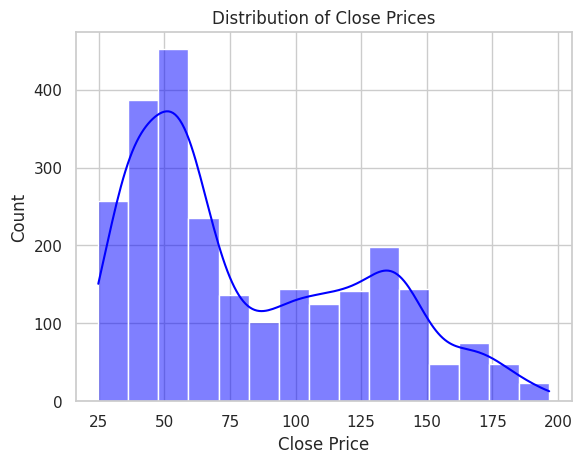

In [27]:
sns.histplot(df['Close'], bins=15, kde=True, color='blue', line_kws={'color': 'red'})
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Count')
plt.show()

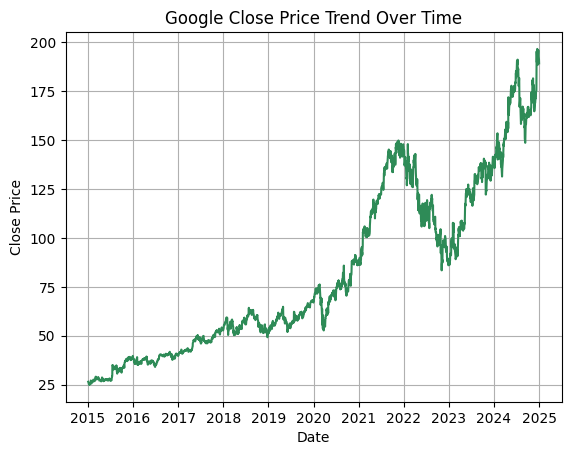

In [19]:
plt.plot(df['Date'], df['Close'], color='seagreen')
plt.title('Google Close Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

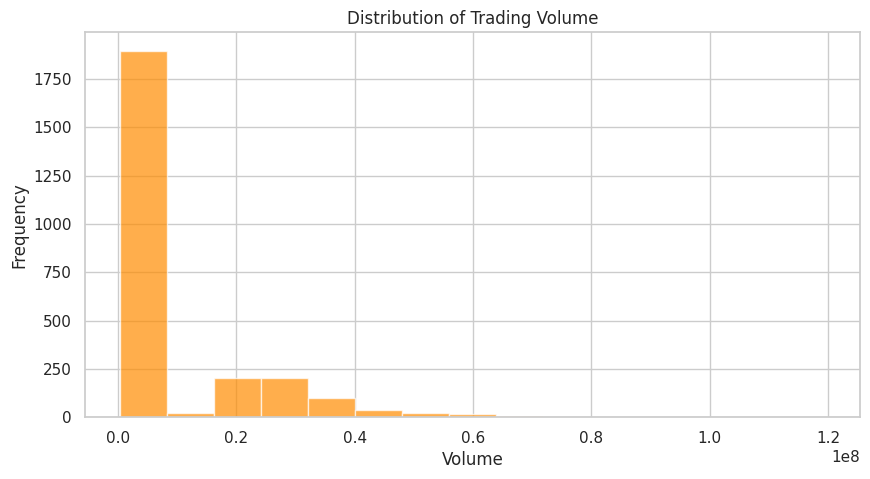

In [28]:
plt.figure(figsize=(10, 5))
df['Volume'].plot(kind='hist', bins=15, alpha=0.7, color='darkorange')
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.grid(True)
plt.show()

In [21]:
df = pd.read_csv("GoogleStockPrices.csv", parse_dates=["Date"])
df.sort_values("Date", inplace=True)

In [22]:
sns.set(style="whitegrid")

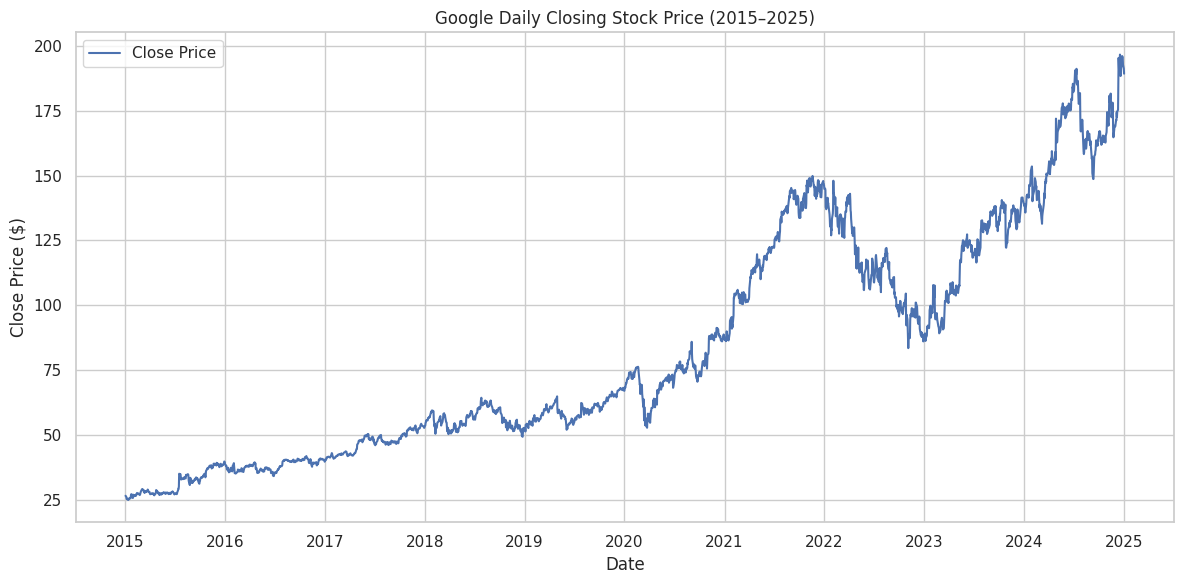

In [23]:
# Time Series Line Plot of Close Price
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"], label="Close Price")
plt.title("Google Daily Closing Stock Price (2015–2025)")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.legend()
plt.tight_layout()
plt.show()

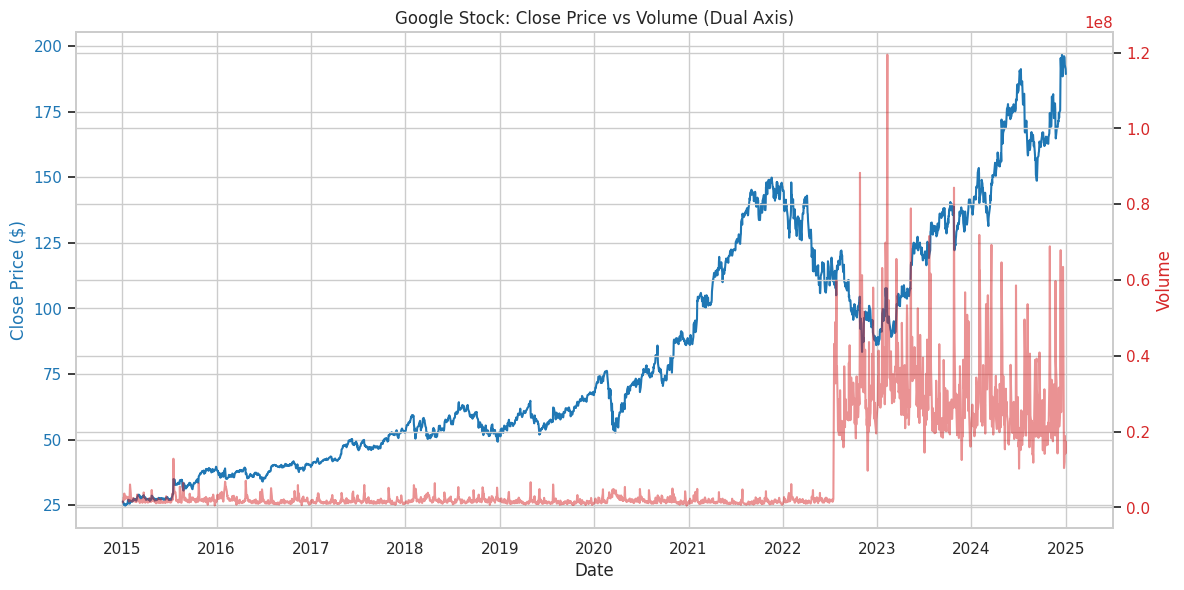

In [24]:
# Dual-Axis Plot of Close Price vs Volume
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price ($)', color=color)
ax1.plot(df['Date'], df['Close'], color=color, label="Close Price")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Volume', color=color)
ax2.plot(df['Date'], df['Volume'], color=color, alpha=0.5, label="Volume")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Google Stock: Close Price vs Volume (Dual Axis)")
plt.show()

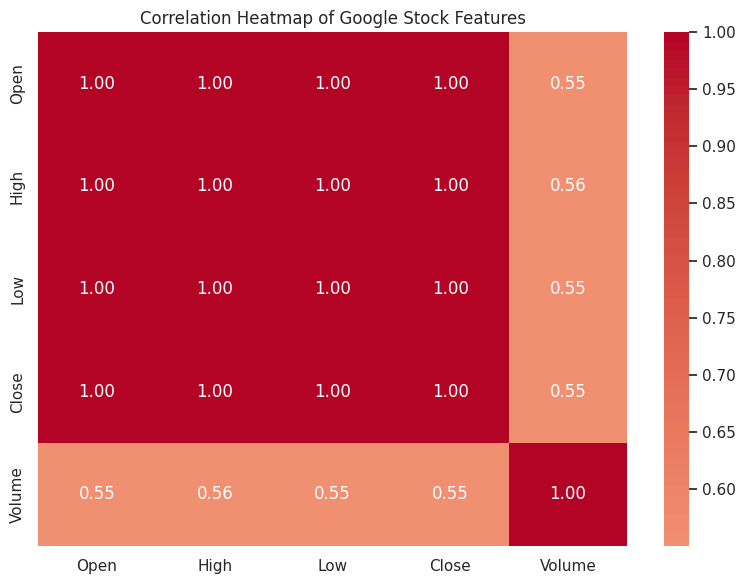

In [25]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df[["Open", "High", "Low", "Close", "Volume"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Google Stock Features")
plt.tight_layout()
plt.show()